# Connect fours


In [ ]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo.classic import connect_four_v3

from src.agents import ConnectFourAgent, RandomAgent


# Probleemstelling

Connect Four is een strategisch bordspel waarin twee spelers om de beurt schijven in een bord laten vallen. Het doel is om als eerste vier schijven op een rij te krijgen, horizontaal, verticaal of diagonaal.Het kan erg lastig zijn voor spelers om telkens de beste zet te maken. Omdat het spel meerdere mogelijke zetten en strategische varianten heeft, zien spelers niet altijd alle kansen of dreigingen. Dit kan leiden tot fouten: spelers missen soms een winnende zet of laten de tegenstander een winnende kans liggen.

**Doelstelling**

We willen een systeem ontwikkelen dat automatisch de beste zet bepaalt om:

- Het risico op fouten te verkleinen. 
- Het spel strategisch wordt benaderd, zowel om te winnen als om te voorkomen dat de tegenstander wint.

Een rule-based benadering is geschikt omdat Connect Four duidelijke, vastgelegde spelregels heeft. Zoals spelers doen om de beurt een zet, een schijf valt naar de laagste vrije plek in een kolom en het doel is om vier op een rij te krijgen. 

**Een rule-based systeem is geschikt omdat Connect Four duidelijke regels heeft, zoals:**

- Spelers doen om de beurt een zet.
- Een schijf valt naar de laagste vrije plek in een kolom.
- Het doel is om vier op een rij te krijgen.


**Met een rule-based systeem kun je deze regels direct programmeren zonder dat het systeem zelf hoeft te leren via data. Je maakt gewoon een set regels die het systeem volgt, zoals:**

- Blokkeer de tegenstander als die bijna wint.
- Maak een winnende zet als dit mogelijk is.
- Neem het midden in beslag


**Voordelen van een rule based system**
- Eenvoudig te begrijpen: De regels van Connect Four zijn helder en kunnen direct als logische voorwaarden worden geprogrammeerd.
- Snelle implementatie: Je hoeft geen grote dataset te verzamelen en te trainen zoals bij machine learning.
- Controleerbaarheid: Omdat het regels volgt die zelf zijn gemaakt, weet je waarom het systeem bepaalde beslissingen neemt.
  
**Machine learning zou hier minder effectief zijn omdat:**
- Veel data nodig: Machine learning vereist grote hoeveelheden data om effectief te zijn.
- Onvoorspelbaar: Het model mogelijk willekeurige beslissingen neemt zonder dat je weet waarom.
- Minder uitlegbaar: Het is lastiger om te begrijpen waarom het model een bepaalde zet kiest.



# Methodologie

**Ontwerp van de regels**

Het rule-based systeem past regels in een vaste volgorde toe om de meest optimale zet te bepalen. De regels zijn als volgt:

1.	Maak een winnende zet: Controleer of er een zet is die direct leidt tot vier op een rij en voer deze uit.
2.	Blokkeer de tegenstander: Als de tegenstander dreigt te winnen, blokkeer deze zet.
3.	Speel naar het midden: Indien er geen directe winst of blokkering nodig is, kies dan voor een zet in het midden van het bord. Dit geeft later meer kansen. 
4.	Bouw kansen: Plaats schijven zodanig dat ze toekomstige winnende lijnen mogelijk maken.
5.	Voorkom meerdere opties voor de tegenstander: Minimaliseer de kansen voor de tegenstander om verschillende dreigingen tegelijkertijd te vormen.


**Implementatiedetails**

De implementatie is opgebouwd uit de volgende stappen:

1.	Spelbord representatie: Er wordt een bord gemaakt waarin lege vakjes, schijven van speler 1 en schijven van speler 2 worden weergegeven.
2.	Regelcontrole: Elke regel wordt in volgorde toegepast. Zodra een regel een geldige zet vindt, wordt deze uitgevoerd.
3.	Prioritering: De regels worden in een vaste volgorde verwerkt. Wanneer een hogere prioriteitsregel wordt geactiveerd, wordt deze direct uitgevoerd en worden lagere regels overgeslagen.



In [1]:
os.chdir("..")  # dit gaat 1 map omhoog

In [2]:
!python -m unittest discover tests

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# Validatie en vergelijking

In [3]:
def evaluate_agents(agent1, agent2, n_games=50):
    """
    Laat agent1 en agent2 meerdere potjes Connect Four spelen.

    Parameters:
    - agent1: De eerste agent die deelneemt aan het spel.
    - agent2: De tweede agent die deelneemt aan het spel. 
    - n_games (int, optioneel): Het aantal spellen dat de agents tegen elkaar spelen. 

    Returns:
    - wins_agent1 (int): Het aantal overwinningen van agent1.
    - wins_agent2 (int): Het aantal overwinningen van agent2.
    - draws (int): Het aantal gelijke spelen.
    
    """
    wins_agent1 = 0
    wins_agent2 = 0
    draws = 0

    for _ in range(n_games):
        env = connect_four_v3.env(render_mode=None)
        env.reset()
        
        done = False
        
        while not done:
            obs = env.observe(env.agent_selection)
            board = obs['observation'][:,:,0]
            
            current_player_id = 1 if env.agent_selection == "player_0" else 2
            
            # Kies de juiste agent
            if current_player_id == agent1.player:
                move = agent1.select_action(board)
            else:
                move = agent2.select_action(board)
            
            env.step(move)
            done = any(env.terminations.values()) or any(env.truncations.values())
        
        # Wie won?
        reward_p0 = env.rewards["player_0"]
        reward_p1 = env.rewards["player_1"]
        if reward_p0 == 1:
            winner = 1
        elif reward_p1 == 1:
            winner = 2
        else:
            winner = 0  # gelijkspel

        if winner == agent1.player:
            wins_agent1 += 1
        elif winner == agent2.player:
            wins_agent2 += 1
        else:
            draws += 1

    return wins_agent1, wins_agent2, draws

In [4]:
# Maak de agents aan
rule_agent = ConnectFourAgent(player=1)
random_agent = RandomAgent(player=2)

# 50 potjes spelen
wins_rule, wins_random, draws = evaluate_agents(rule_agent, random_agent, n_games=50)

print(f"Resultaten over 50 potjes:")
print(f" - Rule-based agent (player=1) heeft gewonnen: {wins_rule}")
print(f" - Random agent     (player=2) heeft gewonnen: {wins_random}")
print(f" - Gelijke spelen: {draws}")

[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] conta

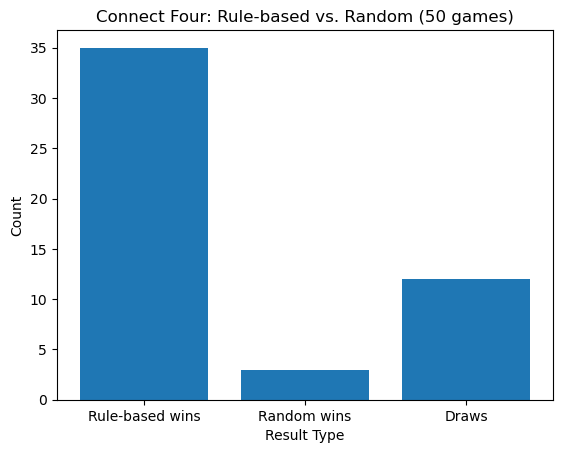

In [5]:
labels = ["Rule-based agent wins", "Random agent wins", "Draws"]
scores = [wins_rule, wins_random, draws]

plt.bar(labels, scores)
plt.title("Connect Four: Rule-based vs. Random (50 games)")
plt.xlabel("Result Type")
plt.ylabel("Count")
plt.show()

In [6]:
!python src/main.py

Kies een kolom (0-6): 


# Resultaten

Uit de bovenstaande grafiek blijkt dat de rule-based agent het vaakst heeft gewonnen. Dit laat zien dat het werken met regels effectief is. De Random agent, die willekeurige zetten doet zonder strategie, heeft daarentegen minder dan vijf keer gewonnen. Dit bevestigt dat de rule-based agent beter presteert.

# Refelctie

**evaluatie**

**beperkingen**